In [1]:
import matplotlib.pyplot as plt
import numpy as np


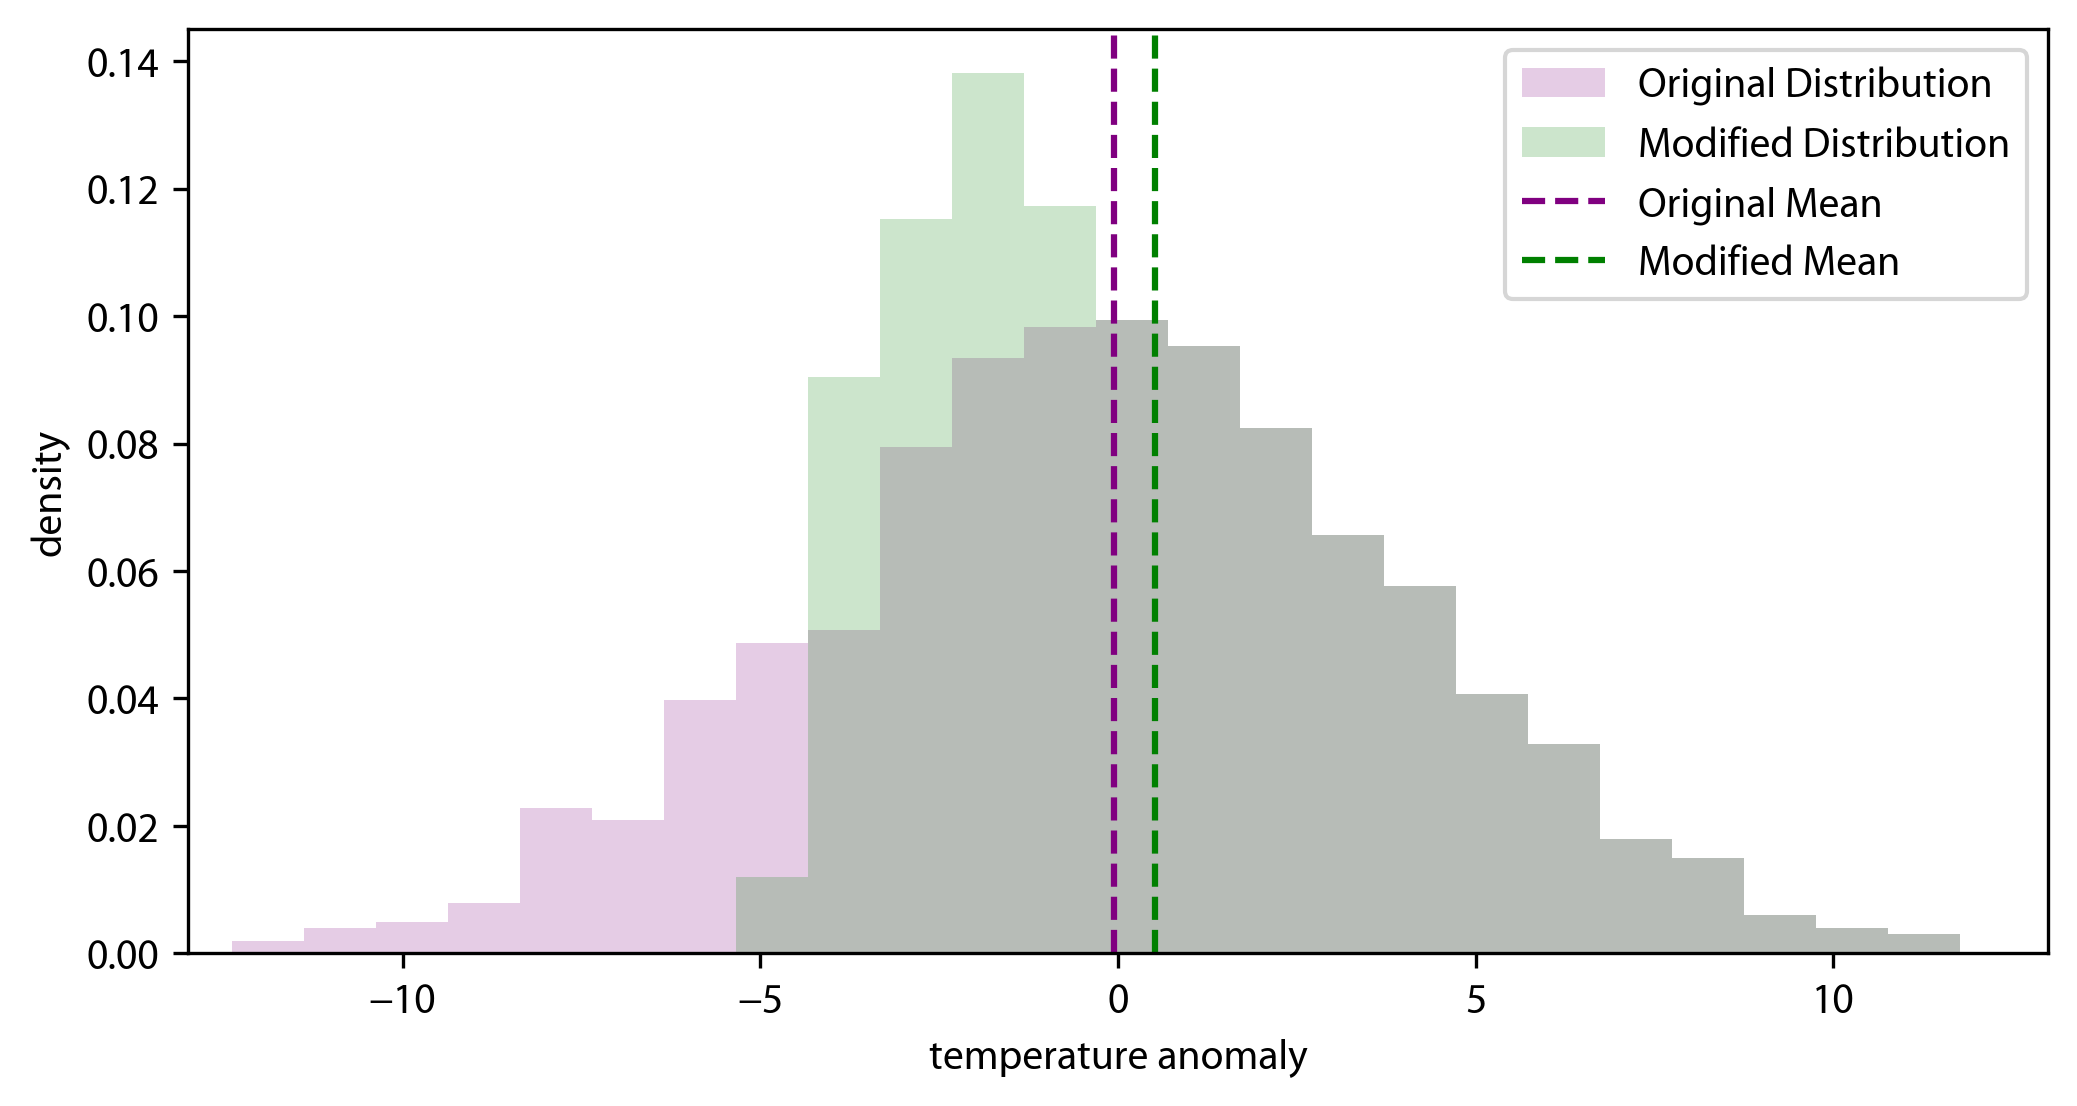

In [3]:
np.random.seed(46)
mu, sigma = 0, 4
s0 = np.random.normal(mu, sigma, 1000)

s1 = np.copy(s0)
s1[s1 <= 0] = s1[s1 <= 0] / (1 + -s1[s1 <= 0]/20) **2

bins = np.linspace(min(s0), max(s0), 30)
plt.figure(figsize=(8, 4))
plt.hist(s0, bins=bins, density=True, alpha=0.2, label='Original Distribution', color='purple')
plt.hist(s1, bins=bins, density=True, alpha=0.2, label='Modified Distribution', color='green')

plt.axvline(np.mean(s0), color='purple', linestyle='--', label='Original Mean')
plt.axvline(np.mean(s1), color='green', linestyle='--', label='Modified Mean')

plt.xlim(-13, 13)
plt.xlabel('temperature anomaly')
plt.ylabel('density')
plt.legend()



In [4]:
print(np.mean(s0), np.mean(s1))

-0.058767993950775935 0.5117108993906262


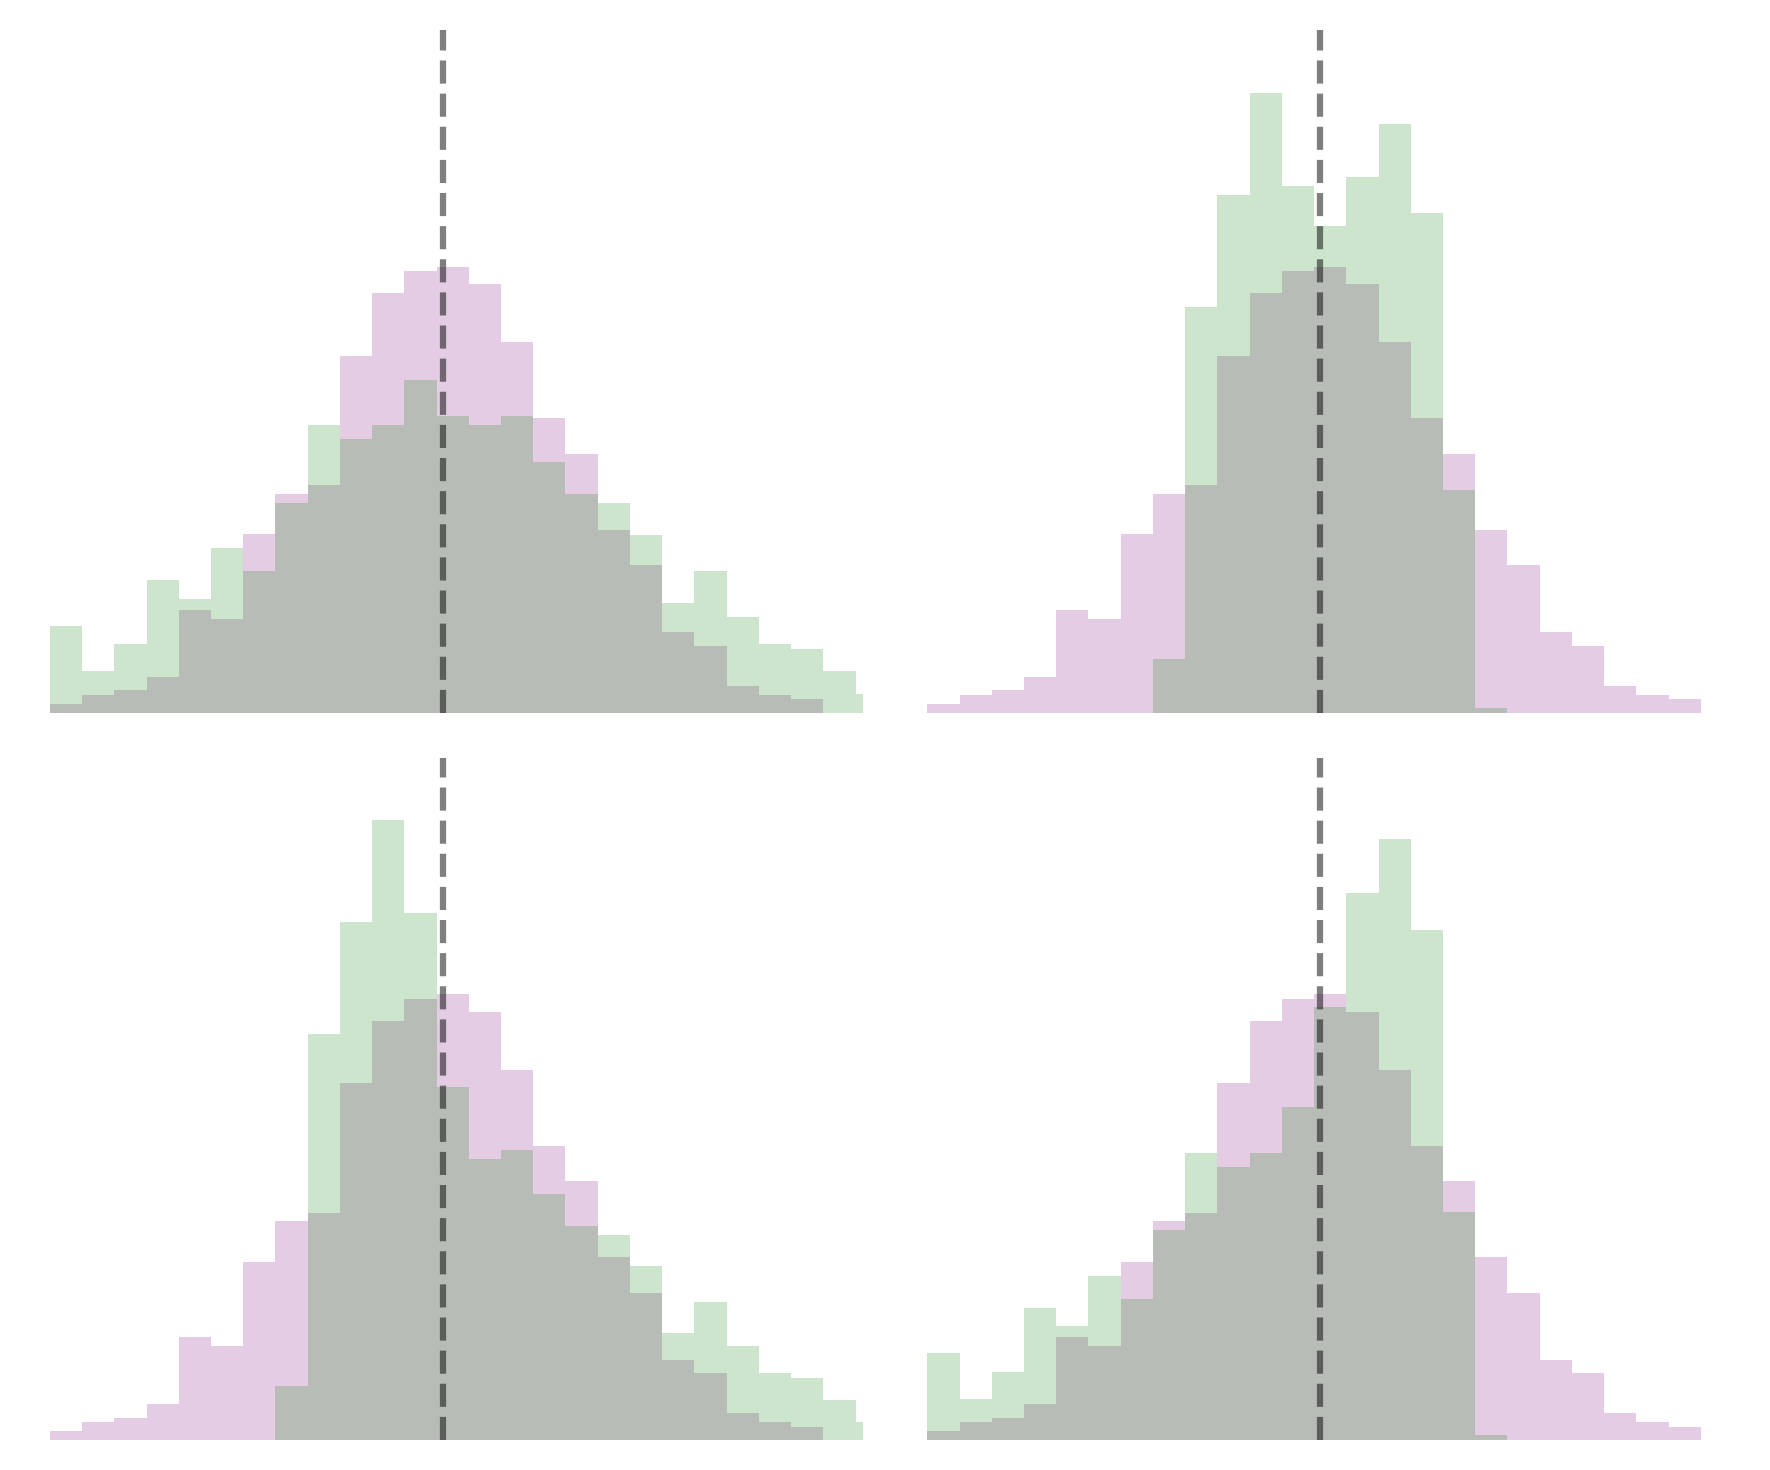

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Set up the figure
fig, axs = plt.subplots(2, 2, figsize=(6, 5))
np.random.seed(46)
mu, sigma = 0, 4
s0 = np.random.normal(mu, sigma, 1000)
bins = np.linspace(min(s0), max(s0), 30)
median_s0 = np.median(s0)  # Calculate median of original distribution

def transform_tails(s0, cold_factor, warm_factor):
   s1 = np.copy(s0)
   if cold_factor > 1:  # stretch
       s1[s1 <= 0] = s1[s1 <= 0] * cold_factor
   else:  # shrink
       s1[s1 <= 0] = s1[s1 <= 0] / (1 + -s1[s1 <= 0]/20)**2
       
   if warm_factor > 1:  # stretch
       s1[s1 > 0] = s1[s1 > 0] * warm_factor
   else:  # shrink
       s1[s1 > 0] = s1[s1 > 0] / (1 + s1[s1 > 0]/20)**2
   return s1

# First pass to determine global y-axis limits
y_max = 0
cases = [
   (1.5, 1.5),
   (0.5, 0.5),
   (0.5, 1.5),
   (1.5, 0.5)
]

# Find max y value across all plots
for cold_f, warm_f in cases:
   s1 = transform_tails(s0, cold_f, warm_f)
   _, bins_edges = np.histogram(s0, bins=bins, density=True)
   hist1, _ = np.histogram(s0, bins=bins, density=True)
   hist2, _ = np.histogram(s1, bins=bins, density=True)
   y_max = max(y_max, max(hist1.max(), hist2.max()))

# Plot with consistent y-axis
for idx, (cold_f, warm_f) in enumerate(cases):
   ax = axs[idx//2, idx%2]
   
   s1 = transform_tails(s0, cold_f, warm_f)
   
   ax.hist(s0, bins=bins, density=True, alpha=0.2, color='purple')
   ax.hist(s1, bins=bins, density=True, alpha=0.2, color='green')
   
   # Add vertical line for original distribution's median
   ax.axvline(median_s0, color='black', linestyle='--', alpha=0.5)
   
   ax.set_xlim(-13, 13)
   ax.set_ylim(0, y_max * 1.1)
   ax.set_xticks([])
   ax.set_yticks([])
   ax.spines['top'].set_visible(False)
   ax.spines['right'].set_visible(False)
   ax.spines['left'].set_visible(False)
   ax.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.show()
fig.savefig('types_illustration.png', dpi=300)